In [1]:
import itk
import vtk
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Chargement des images
image1_path = "Data/case6_gre1.nrrd"
image2_path = "Data/case6_gre2.nrrd"


In [3]:
#recalage des images
def align_images(fixed_image_path, moving_image_path, output_image_path):
    PixelType = itk.F
    Dimension = 3

    FixedImageType = itk.Image[PixelType, Dimension]
    MovingImageType = itk.Image[PixelType, Dimension]

    # Lecture
    fixed_image = itk.imread(fixed_image_path, PixelType)
    moving_image = itk.imread(moving_image_path, PixelType)


    TransformType = itk.TranslationTransform[itk.D, Dimension]

    # optimiseur
    OptimizerType = itk.RegularStepGradientDescentOptimizerv4[itk.D]
    optimizer = OptimizerType.New()
    optimizer.SetLearningRate(4)
    optimizer.SetMinimumStepLength(0.01)
    optimizer.SetRelaxationFactor(0.5)
    optimizer.SetNumberOfIterations(200)

    # métrique
    MetricType = itk.MeanSquaresImageToImageMetricv4[FixedImageType, MovingImageType]
    metric = MetricType.New()

    # registreur
    RegistrationType = itk.ImageRegistrationMethodv4[FixedImageType, MovingImageType]
    registration = RegistrationType.New()
    registration.SetMetric(metric)
    registration.SetOptimizer(optimizer)

    #transformée initiale
    initial_transform = TransformType.New()
    initial_transform.SetIdentity()

    # Définition de l'échantillonnage
    ResampleFilterType = itk.ResampleImageFilter[MovingImageType, FixedImageType]
    resampler = ResampleFilterType.New()
    resampler.SetTransform(initial_transform)
    resampler.SetSize(fixed_image.GetLargestPossibleRegion().GetSize())
    resampler.SetOutputSpacing(fixed_image.GetSpacing())
    resampler.SetOutputOrigin(fixed_image.GetOrigin())
    resampler.SetOutputDirection(fixed_image.GetDirection())

    # Alignement
    registration.SetFixedImage(fixed_image)
    registration.SetMovingImage(moving_image)
    registration.SetInitialTransform(initial_transform)
    #registration.SetInterpolator(itk.LinearInterpolateImageFunction[FixedImageType, itk.D].New())

    # Exécution de l'alignement
    registration.Update()

    # Application
    resampler.SetInput(moving_image)
    resampler.Update()

    # Sauvegarde
    itk.imwrite(resampler.GetOutput(), output_image_path)



fixed_image_path = "Data/case6_gre1.nrrd"
moving_image_path = "Data/case6_gre2.nrrd"
output_image_path = "Data/aligned_image.nrrd"

align_images(fixed_image_path, moving_image_path, output_image_path)

In [4]:
#2-3 inits
fixed_image_path = "Data/case6_gre1.nrrd"
moving_image_path = "Data/case6_gre2.nrrd"
output_image_path = "Data/aligned_image.nrrd"
PixelType = itk.F

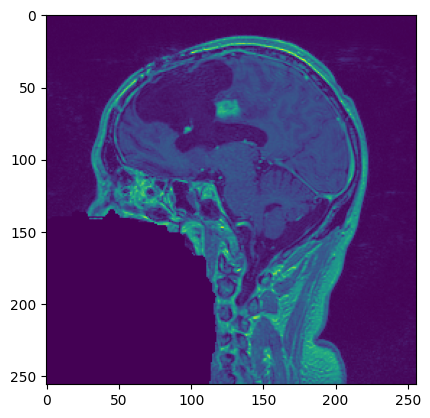

In [5]:
fixed_image = itk.imread(fixed_image_path, PixelType)
plt.imshow(itk.GetArrayViewFromImage(fixed_image)[80])
plt.show()

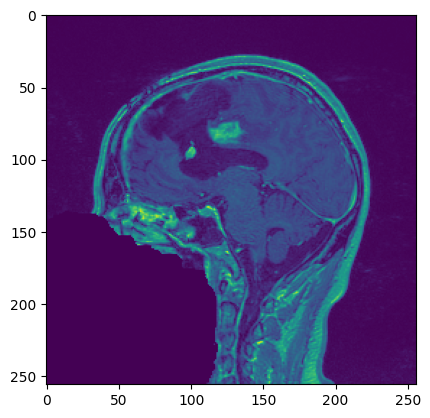

In [6]:
moving_image = itk.imread(moving_image_path, PixelType)
plt.imshow(itk.GetArrayViewFromImage(moving_image)[80])
plt.show()

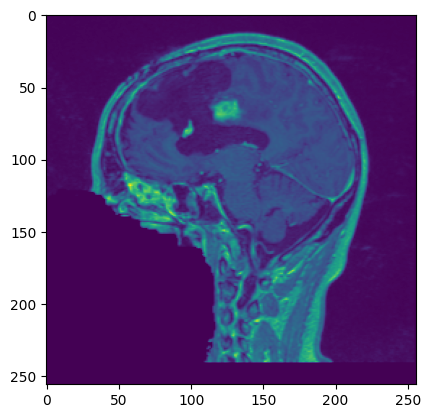

In [7]:
output_image = itk.imread(output_image_path, PixelType)
plt.imshow(itk.GetArrayViewFromImage(output_image)[80])
plt.show()

In [8]:
# 3) Segmentation des tumeurs
# Chemin du fichier d'entrée
input_file = "Data/case6_gre1.nrrd"

PixelType = itk.UC

Dimension = 3

ImageType = itk.Image[PixelType, Dimension]

# Lecture
reader = itk.ImageFileReader[ImageType].New()
reader.SetFileName(input_file)
reader.Update()

# Segmentation de la tumeur avec l'algorithme Region Growing
filter_type = itk.ConnectedThresholdImageFilter[ImageType, ImageType].New()
filter_type.SetInput(reader.GetOutput())

# Paramètres de l'algo
seed_point = itk.Index[Dimension]()
seed_point.SetElement(0, 100)
seed_point.SetElement(1, 100)
seed_point.SetElement(2, 50)
lower_threshold = 50
upper_threshold = 200

filter_type.SetSeed(seed_point)
filter_type.SetLower(lower_threshold)
filter_type.SetUpper(upper_threshold)

# segmentation
filter_type.Update()

# Résultat
output = filter_type.GetOutput()

# Écriture
output_file = "Data/segmentation_result1.nrrd"
writer = itk.ImageFileWriter[ImageType].New()
writer.SetFileName(output_file)
writer.SetInput(output)
writer.Update()

print("Segmentation terminée. Résultat enregistré dans", output_file)

Segmentation terminée. Résultat enregistré dans data/segmentation_result1.nrrd


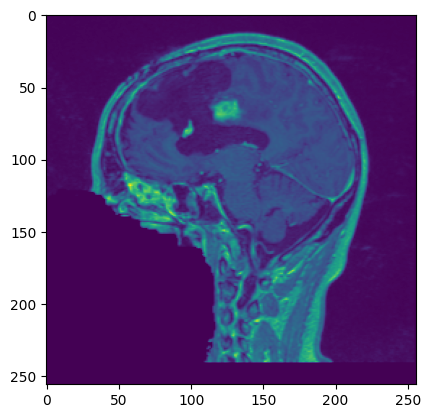

In [9]:
output_segment_path = "Data/segmentation_result1.nrrd"
PixelType = itk.UC
output_segment= itk.imread(output_segment_path, PixelType)
plt.imshow(itk.GetArrayViewFromImage(output_image)[80])
plt.show()

In [10]:
# Segmentation des tumeurs pour le deuxieme volume

input_file = "Data/case6_gre2.nrrd"

PixelType = itk.UC

Dimension = 3

ImageType = itk.Image[PixelType, Dimension]

# Lecture
reader = itk.ImageFileReader[ImageType].New()
reader.SetFileName(input_file)
reader.Update()

# Segmentation de la tumeur avec l'algorithme Region Growing
filter_type = itk.ConnectedThresholdImageFilter[ImageType, ImageType].New()
filter_type.SetInput(reader.GetOutput())

# Paramètres de l'algo
seed_point = itk.Index[Dimension]()
seed_point.SetElement(0, 100)
seed_point.SetElement(1, 100)
seed_point.SetElement(2, 50)
lower_threshold = 50
upper_threshold = 200

filter_type.SetSeed(seed_point)
filter_type.SetLower(lower_threshold)
filter_type.SetUpper(upper_threshold)

# segmentation
filter_type.Update()

# Résultat 
output = filter_type.GetOutput()

# Écriture 
output_file = "Data/segmentation_result2.nrrd"
writer = itk.ImageFileWriter[ImageType].New()
writer.SetFileName(output_file)
writer.SetInput(output)
writer.Update()

print("Segmentation terminée. Résultat enregistré dans", output_file)

Segmentation terminée. Résultat enregistré dans data/segmentation_result2.nrrd


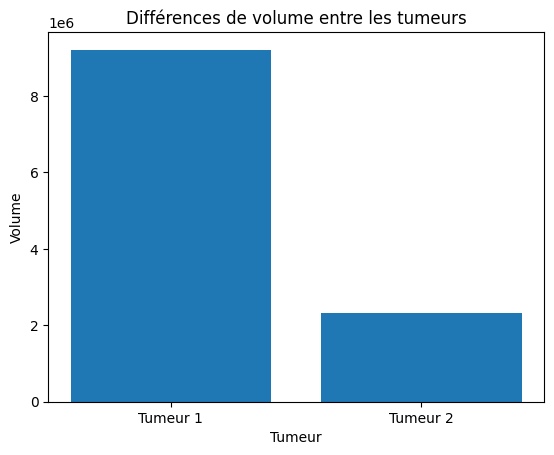

Différence de volume entre les tumeurs :  6892274


In [11]:
# 4) Analyse et visualisation des changements
# Calcul des changements entre les deux images segmentées
# Calcul de la différence de volume

# Chemins des fichiers
segmentation_file1 = "data/segmentation_result1.nrrd"
segmentation_file2 = "data/segmentation_result2.nrrd"

# Types d'images
PixelType = itk.UC
Dimension = 3
ImageType = itk.Image[PixelType, Dimension]

# Lecture des fichiers 
reader1 = itk.ImageFileReader[ImageType].New()
reader1.SetFileName(segmentation_file1)
reader1.Update()

reader2 = itk.ImageFileReader[ImageType].New()
reader2.SetFileName(segmentation_file2)
reader2.Update()

# Obtention des informations spatiales de l'image 1
image1 = reader1.GetOutput()
spacing1 = image1.GetSpacing()
origin1 = image1.GetOrigin()
direction1 = image1.GetDirection()

# Création d'une image de référence avec les informations spatiales de l'image 1
reference_image = itk.Image[PixelType, Dimension].New()
reference_image.SetRegions(image1.GetLargestPossibleRegion())
reference_image.SetSpacing(spacing1)
reference_image.SetOrigin(origin1)
reference_image.SetDirection(direction1)
reference_image.Allocate()
reference_image.FillBuffer(0)

# Redimensionnement de l'image 2 pour correspondre à l'image de référence
resampler = itk.ResampleImageFilter[ImageType, ImageType].New()
resampler.SetInput(reader2.GetOutput())
resampler.SetSize(reference_image.GetLargestPossibleRegion().GetSize())
resampler.SetOutputSpacing(reference_image.GetSpacing())
resampler.SetOutputOrigin(reference_image.GetOrigin())
resampler.SetOutputDirection(reference_image.GetDirection())
resampler.Update()

# Calcul des différences de volume
label_stats_filter = itk.LabelStatisticsImageFilter[ImageType, ImageType].New()
label_stats_filter.SetLabelInput(reader1.GetOutput())
label_stats_filter.SetInput(resampler.GetOutput())
label_stats_filter.Update()

volume_difference = abs(label_stats_filter.GetCount(1) - label_stats_filter.GetCount(0))

# Visualisation des différences de volume
labels = ['Tumeur 1', 'Tumeur 2']
volumes = [label_stats_filter.GetCount(0), label_stats_filter.GetCount(1)]

plt.bar(labels, volumes)
plt.xlabel('Tumeur')
plt.ylabel('Volume')
plt.title('Différences de volume entre les tumeurs')
plt.show()

print("Différence de volume entre les tumeurs : ", volume_difference)